In [1]:
# Packages and Imports

import numpy as np
import matplotlib.pyplot as plt

# SciPy library contains framework for differential evolution algorithm
from scipy.optimize import differential_evolution

# Accuracy score and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix 

# Nueural network packages
import tensorflow
from tensorflow.keras.optimizers.legacy import Adam 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

/Users/freddiejones/miniconda3/envs/tensorflow/lib/python3.10/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [2]:
# Load dataset
wine_data = np.loadtxt('/Users/freddiejones/Desktop/EvolutionaryML/winequality-red.csv', delimiter=',', skiprows=1) # print(wine_data.shape)
np.set_printoptions(formatter={'float': lambda x: '{0:0.2f}'.format(x)})

In [3]:
# Binary classification transformation
wine_data[wine_data[:, -1] < 5.5, -1] = 0 
wine_data[wine_data[:, -1] >= 5.5, -1] = 1
print(wine_data)

[[7.40 0.70 0.00 ... 0.56 9.40 0.00]
 [7.80 0.88 0.00 ... 0.68 9.80 0.00]
 [7.80 0.76 0.04 ... 0.65 9.80 0.00]
 ...
 [6.30 0.51 0.13 ... 0.75 11.00 1.00]
 [5.90 0.65 0.12 ... 0.71 10.20 0.00]
 [6.00 0.31 0.47 ... 0.66 11.00 1.00]]


In [4]:
# Balance dataset
np.random.shuffle(wine_data)

In [5]:
# Split into test and train
thirty_percent = int(0.3 * len(wine_data[:, 0]))

X_test = wine_data[:thirty_percent, :-1] 
Y_test = wine_data[:thirty_percent, -1]

X_train = wine_data[thirty_percent:, 0:-1] 
Y_train = wine_data[thirty_percent:, -1]

In [6]:
# Normalize wine data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [7]:
test_accuracy_scores = []
train_accuracy_scores = []
nn_model = None

In [8]:
# Fitness determined by binary accuracy score
def fitness_func(x):
    
    # Globals
    global test_accuracy_scores, train_accuracy_scores, nn_model
    
    # Make neural network model using Sequential keras model
    # Define the architecture of neural network
    nn_model = Sequential()
    nn_model.add(Dense(units=x[0], input_dim = len(X_train[0, :]), activation = 'sigmoid')) # 
    nn_model.add(Dense(units=x[1], activation = 'sigmoid'))
    nn_model.add(Dense(1, activation = 'sigmoid'))
    
    # Set loss to Binary Cross Entropy and compile the model with a backprop
    loss = tensorflow.keras.losses.BinaryCrossentropy()
    nn_model.compile(loss=loss, optimizer=Adam(), metrics=['accuracy'])
    
    # Fit over 10 generations
    history = nn_model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))
    
    # Evaluate the fitness of the solution based on accuracy metric
    accuracy = history.history['accuracy'][-1]
    test_accuracy = history.history['val_accuracy'][-1]
    train_accuracy_scores.append(accuracy)
    test_accuracy_scores.append(test_accuracy)
    
    return accuracy

In [9]:
# Bounds were chosen using trial and error
bounds = [(10, 100), (10, 100)]

Negative lower bounds often crashed the kernel in Jupyter notebook. (10, 100) makes the algorithm run for a while but has proven to produce the best classification accuracy from my fitness function.

In [10]:
# Written using SciPy differential_evolution documentation
# Fitness function and bounds are self defined
# Max_Iter for maximum number of generations
# TOL for convergence tolerance
# Mutation explained below
# Recombination explained below
result = differential_evolution(fitness_func, 
                                bounds, 
                                maxiter=10, 
                                tol=0.01,
                                mutation=(0.5, 1),
                                recombination=.7)

Metal device set to: Apple M2
Epoch 1/10


2023-03-28 18:54:40.780496: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


35/35 [==============================] - 1s 11ms/step - loss: 0.6766 - accuracy: 0.5580 - val_loss: 0.6598 - val_accuracy: 0.6555
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6527 - val_loss: 0.6270 - val_accuracy: 0.7077
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6077 - accuracy: 0.7080 - val_loss: 0.5970 - val_accuracy: 0.7015
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5746 - accuracy: 0.7152 - val_loss: 0.5634 - val_accuracy: 0.7390
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7268 - val_loss: 0.5496 - val_accuracy: 0.7349
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5406 - accuracy: 0.7295 - val_loss: 0.5491 - val_accuracy: 0.7182
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7339 - val_loss: 0.5258 - val_accuracy: 0.7578
Epoch 8/10
35/35 [============

35/35 [==============================] - 0s 5ms/step - loss: 0.5396 - accuracy: 0.7259 - val_loss: 0.5391 - val_accuracy: 0.7453
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5326 - accuracy: 0.7277 - val_loss: 0.5352 - val_accuracy: 0.7411
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5278 - accuracy: 0.7321 - val_loss: 0.5277 - val_accuracy: 0.7453
Epoch 10/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5262 - accuracy: 0.7312 - val_loss: 0.5263 - val_accuracy: 0.7453
Epoch 1/10
35/35 [==============================] - 1s 10ms/step - loss: 0.6897 - accuracy: 0.5518 - val_loss: 0.6922 - val_accuracy: 0.4990
Epoch 2/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6774 - accuracy: 0.5491 - val_loss: 0.6812 - val_accuracy: 0.5031
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6658 - accuracy: 0.5518 - val_loss: 0.6681 - val_accuracy: 0.5136
Epoch 4/10
35/35 [===========

35/35 [==============================] - 0s 5ms/step - loss: 0.6055 - accuracy: 0.6911 - val_loss: 0.5881 - val_accuracy: 0.7349
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.7054 - val_loss: 0.5750 - val_accuracy: 0.7077
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5508 - accuracy: 0.7259 - val_loss: 0.5429 - val_accuracy: 0.7411
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5375 - accuracy: 0.7304 - val_loss: 0.5408 - val_accuracy: 0.7432
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5310 - accuracy: 0.7295 - val_loss: 0.5412 - val_accuracy: 0.7474
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7259 - val_loss: 0.5369 - val_accuracy: 0.7537
Epoch 9/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5267 - accuracy: 0.7339 - val_loss: 0.5251 - val_accuracy: 0.7537
Epoch 10/10
35/35 [============

35/35 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7250 - val_loss: 0.5327 - val_accuracy: 0.7474
Epoch 10/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.7205 - val_loss: 0.5283 - val_accuracy: 0.7516
Epoch 1/10
35/35 [==============================] - 1s 13ms/step - loss: 0.6955 - accuracy: 0.5125 - val_loss: 0.6880 - val_accuracy: 0.4969
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.5509 - val_loss: 0.6723 - val_accuracy: 0.5261
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6576 - accuracy: 0.6313 - val_loss: 0.6590 - val_accuracy: 0.5699
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6429 - accuracy: 0.6179 - val_loss: 0.6391 - val_accuracy: 0.6764
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.7205 - val_loss: 0.6223 - val_accuracy: 0.6848
Epoch 6/10
35/35 [===========

35/35 [==============================] - 0s 7ms/step - loss: 0.5521 - accuracy: 0.7214 - val_loss: 0.5496 - val_accuracy: 0.7390
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5401 - accuracy: 0.7268 - val_loss: 0.5462 - val_accuracy: 0.7370
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5322 - accuracy: 0.7286 - val_loss: 0.5317 - val_accuracy: 0.7453
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5285 - accuracy: 0.7295 - val_loss: 0.5370 - val_accuracy: 0.7411
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5270 - accuracy: 0.7304 - val_loss: 0.5272 - val_accuracy: 0.7495
Epoch 10/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5248 - accuracy: 0.7375 - val_loss: 0.5248 - val_accuracy: 0.7578
Epoch 1/10
35/35 [==============================] - 1s 14ms/step - loss: 0.6751 - accuracy: 0.5777 - val_loss: 0.6722 - val_accuracy: 0.5031
Epoch 2/10
35/35 [===========

35/35 [==============================] - 1s 14ms/step - loss: 0.6753 - accuracy: 0.5741 - val_loss: 0.6759 - val_accuracy: 0.4969
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.6509 - val_loss: 0.6239 - val_accuracy: 0.6827
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.7098 - val_loss: 0.5833 - val_accuracy: 0.7182
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5646 - accuracy: 0.7196 - val_loss: 0.5524 - val_accuracy: 0.7474
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5474 - accuracy: 0.7179 - val_loss: 0.5403 - val_accuracy: 0.7432
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5353 - accuracy: 0.7295 - val_loss: 0.5395 - val_accuracy: 0.7453
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 0.7286 - val_loss: 0.5357 - val_accuracy: 0.7495
Epoch 8/10
35/35 [============

35/35 [==============================] - 0s 5ms/step - loss: 0.5571 - accuracy: 0.7205 - val_loss: 0.5499 - val_accuracy: 0.7453
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5424 - accuracy: 0.7232 - val_loss: 0.5429 - val_accuracy: 0.7411
Epoch 9/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7259 - val_loss: 0.5381 - val_accuracy: 0.7411
Epoch 10/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5323 - accuracy: 0.7241 - val_loss: 0.5417 - val_accuracy: 0.7432
Epoch 1/10
35/35 [==============================] - 1s 14ms/step - loss: 0.6878 - accuracy: 0.5429 - val_loss: 0.6943 - val_accuracy: 0.4969
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6635 - accuracy: 0.5902 - val_loss: 0.6597 - val_accuracy: 0.5929
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6380 - accuracy: 0.6643 - val_loss: 0.6304 - val_accuracy: 0.6827
Epoch 4/10
35/35 [===========

35/35 [==============================] - 0s 6ms/step - loss: 0.6251 - accuracy: 0.6830 - val_loss: 0.6149 - val_accuracy: 0.7035
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5967 - accuracy: 0.7312 - val_loss: 0.5870 - val_accuracy: 0.7286
Epoch 5/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5725 - accuracy: 0.7205 - val_loss: 0.5596 - val_accuracy: 0.7516
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7304 - val_loss: 0.5475 - val_accuracy: 0.7453
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5428 - accuracy: 0.7259 - val_loss: 0.5395 - val_accuracy: 0.7474
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5354 - accuracy: 0.7312 - val_loss: 0.5371 - val_accuracy: 0.7537
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5314 - accuracy: 0.7339 - val_loss: 0.5256 - val_accuracy: 0.7641
Epoch 10/10
35/35 [============

35/35 [==============================] - 0s 5ms/step - loss: 0.5296 - accuracy: 0.7277 - val_loss: 0.5297 - val_accuracy: 0.7537
Epoch 10/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5264 - accuracy: 0.7393 - val_loss: 0.5242 - val_accuracy: 0.7557
Epoch 1/10
35/35 [==============================] - 1s 18ms/step - loss: 0.6863 - accuracy: 0.5223 - val_loss: 0.6772 - val_accuracy: 0.5219
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.6143 - val_loss: 0.6609 - val_accuracy: 0.5449
Epoch 3/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6371 - accuracy: 0.6420 - val_loss: 0.6276 - val_accuracy: 0.7119
Epoch 4/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6130 - accuracy: 0.7045 - val_loss: 0.6031 - val_accuracy: 0.7119
Epoch 5/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5874 - accuracy: 0.7205 - val_loss: 0.5808 - val_accuracy: 0.7161
Epoch 6/10
35/35 [===========

35/35 [==============================] - 0s 5ms/step - loss: 0.5721 - accuracy: 0.7223 - val_loss: 0.5637 - val_accuracy: 0.7349
Epoch 6/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5551 - accuracy: 0.7214 - val_loss: 0.5524 - val_accuracy: 0.7286
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5427 - accuracy: 0.7295 - val_loss: 0.5406 - val_accuracy: 0.7474
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5359 - accuracy: 0.7375 - val_loss: 0.5365 - val_accuracy: 0.7516
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.7330 - val_loss: 0.5235 - val_accuracy: 0.7620
Epoch 10/10
35/35 [==============================] - 0s 7ms/step - loss: 0.5277 - accuracy: 0.7348 - val_loss: 0.5333 - val_accuracy: 0.7495
Epoch 1/10
35/35 [==============================] - 1s 19ms/step - loss: 0.6852 - accuracy: 0.5509 - val_loss: 0.6835 - val_accuracy: 0.4990
Epoch 2/10
35/35 [===========

35/35 [==============================] - 1s 19ms/step - loss: 0.6746 - accuracy: 0.5848 - val_loss: 0.6841 - val_accuracy: 0.4969
Epoch 2/10
35/35 [==============================] - 0s 6ms/step - loss: 0.6536 - accuracy: 0.6277 - val_loss: 0.6432 - val_accuracy: 0.6639
Epoch 3/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6228 - accuracy: 0.6875 - val_loss: 0.6186 - val_accuracy: 0.6681
Epoch 4/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5933 - accuracy: 0.7161 - val_loss: 0.5840 - val_accuracy: 0.7307
Epoch 5/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5682 - accuracy: 0.7286 - val_loss: 0.5647 - val_accuracy: 0.7390
Epoch 6/10
35/35 [==============================] - 0s 5ms/step - loss: 0.5515 - accuracy: 0.7277 - val_loss: 0.5485 - val_accuracy: 0.7474
Epoch 7/10
35/35 [==============================] - 0s 6ms/step - loss: 0.5406 - accuracy: 0.7321 - val_loss: 0.5408 - val_accuracy: 0.7495
Epoch 8/10
35/35 [============

# TOL, Selection, Mutation, and Crossover

### https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

TOL value required some research on my end. From my understanding, TOL is convergence tolerance; if the change resulting from a singular generation is smaller than the tolerance value (TOL value as parameter), then the next generations will be terminated.

The default population initialization is Latin Hypercube. This generates n points in [0, 1) to the power of d, where d is the dimension of of the parameter space.

The mutation type used in this algorithm is called dithering. Essentially, the mutation rate/constant is randomly changed each generation. The constant chosen is taken randomly from the values inbetween U(min, max). This parameter has increased my computation and run time significantly. The default mutation strategy is best/1, which mutates the best vectorized offspring by adding a scaled difference between itself and another randomly selected vector.

The recombination parameter is equivalent to crossover probability. The higher/closer the value is to 1, the more mutants there will be in the next generation.

In [11]:
# Written using SciPy differential_evolution documentation
print('Optimal hyperparameters for input and hidden layer(s):', result.x) # result.x returns array of the solution/optimized hyperparameters
print('Success: ', result.success) # BOOL value returning if the optimization was a success or not
print('Message: ', result.message) # Success or failure message
print('Number of iterations: ', result.nit)

Optimal hyperparameters for input and hidden layer(s): [61.84 24.84]
Success:  True
Message:  Optimization terminated successfully.
Number of iterations:  1


In [12]:
# Type difference issue that I was able to solve using the link below:
# Taken from https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

training_predictions = (nn_model.predict(X_train) > 0.5).astype("int32")
testing_predictions = (nn_model.predict(X_test) > 0.5).astype("int32")

15/15 [==============================] - 0s 4ms/step


In [13]:
confusion_matrix_test = confusion_matrix(Y_test, testing_predictions)
confusion_matrix_train = confusion_matrix(Y_train, training_predictions) 

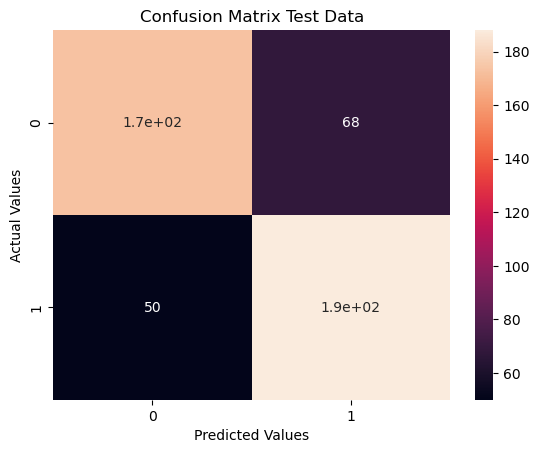

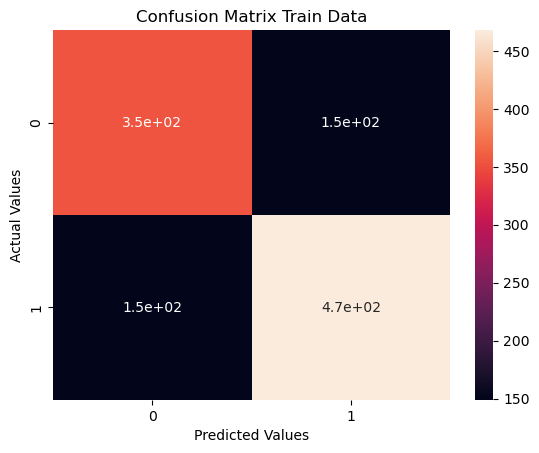

In [14]:
# Visualize monfusion matrices using seaborn like other assignments
import seaborn as sns

# Test data
sns.heatmap(confusion_matrix_test, annot=True)
plt.title('Confusion Matrix Test Data')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Train data
sns.heatmap(confusion_matrix_train, annot=True)
plt.title('Confusion Matrix Train Data')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Same implementation of my confusion matrix for every other assignments. I used the confusion_matrix type from sk-learn to visualize the predictions of my neural network after optimization through my differential evolution algorithm.

In [15]:
test_loss, test_accuracy = nn_model.evaluate(X_test, Y_test)
print('Test accuracy:', test_accuracy)

15/15 [==============================] - 0s 7ms/step - loss: 0.5301 - accuracy: 0.7537
Test accuracy: 0.7536534667015076


In [16]:
train_loss, train_accuracy = nn_model.evaluate(X_train, Y_train)
print('Train accuracy:', train_accuracy)

35/35 [==============================] - 0s 3ms/step - loss: 0.5258 - accuracy: 0.7339
Train accuracy: 0.7339285612106323


Text(0.5, 0, 'Generations')

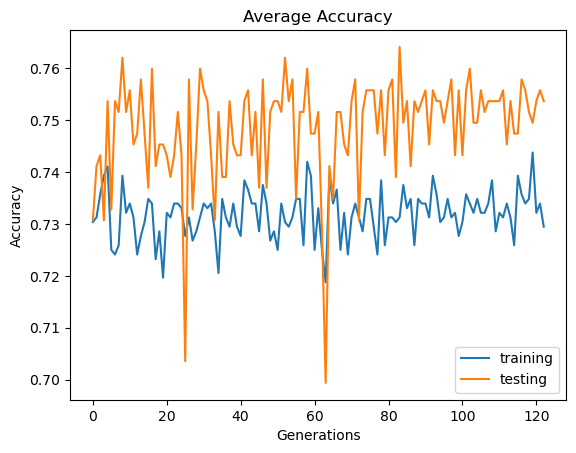

In [17]:
# Plot accuracy data

plt.plot(train_accuracy_scores)
plt.plot(test_accuracy_scores)
plt.title('Average Accuracy')
plt.legend(['training', 'testing'], loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Generations')

# Summary Report

Implementing a differential evolution algorithm felt very similar to my implementation of an evolutionary strategy. Mutation operators are used in both, preparing the data was exactly the same, and my accuracy/fitness score increased after each generation. The DE (this algorithm) converged quicker than both the evolutionary strategy and genetic algorithm I implemented in previous homeworks as well. This is due to the fact that a DE undergoes a fairly simple arithmetic operation and has a high recombination constant/crossover probability. The runtimes I experienced for this algorithm to converge were between 2-6 minutes.

Accuracy score over the training dataset increases to  an average of 73.3% in just 10 generations, while the average accuracy score over our test dataset reaches and impressive 75.4%. These values could be even further increased by increasing the number of epochs/generations as well. These improvements can be seen in the confusion matrices above. In the test dataset, there were only 50 incorrect classifications where our algorithm predicted "0" incorrectly and 68 incorrect classifications where "1" was predicted incorrectly. The coloring shows high correlation where the predicted values match the actual, and low where they don't. These confusion matrix results visually corroborates an improved model over our other assignments. 

The accuracy vs generation graph visualization for this DE shows a sporadic curve for both testing and training data. The average accuracy for both testing and training data are higher than those of any other algorithm we've implemented in previous assignments. Our test data ended up outperforming our training data, but not by too much. The average accuracy scores are within 2% of one another.

It outperforms the evolutionary strategy using the same number of generations and similar hyperparameter values where I could. It also outperforms our evolutionary strategy, adaptive mutation rate, our standard feed-forward neural network with backpropagation, and our genetic algorithm, making it the most effective algorithm yet with this dataset. I hypothesize that my genetic algorithm implementation would evetually outperform this DE, but given 10 generations and the efficiency of a DE, I am not surprised by it's effective optimzation in this problem. 

# References

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

https://keras.io/api/layers/core_layers/dense/

https://stackoverflow.com/questions/32302654/scipy-differential-evolution

https://machinelearningmastery.com/differential-evolution-global-optimization-with-python/

https://stackoverflow.com/questions/68836551/keras-attributeerror-sequential-object-has-no-attribute-predict-classes

https://www.sciencedirect.com/topics/engineering/convergence-tolerance#:~:text=In%20our%20example%20a%20%E2%80%9Cconvergence,tolerances%2C%20the%20iterations%20are%20terminated.

https://machinelearningmastery.com/differential-evolution-from-scratch-in-python/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.qmc.LatinHypercube.html#scipy.stats.qmc.LatinHypercube